In [ ]:
import numpy as np

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2024-04-27 03:11:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-04-27 03:11:24 (51.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
dataset = "/content/drive/MyDrive/PRNN/Assignment3/animals10/raw-img"
walk_through_dir(dataset)

There are 10 directories and 0 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/raw-img'.
There are 0 directories and 4863 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/raw-img/cane'.
There are 0 directories and 2623 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/raw-img/cavallo'.
There are 0 directories and 1446 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/raw-img/elefante'.
There are 0 directories and 2112 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/raw-img/farfalla'.
There are 0 directories and 3098 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/raw-img/gallina'.
There are 0 directories and 1668 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/raw-img/gatto'.
There are 0 directories and 1866 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/raw-img/mucca'.
There are 0 directories and 1820 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/raw-img/pecora'.
There ar

In [21]:
dataset = "/content/drive/MyDrive/PRNN/Assignment3/animals10/64"
walk_through_dir(dataset)

There are 10 directories and 0 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/64'.
There are 0 directories and 4863 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/64/cane'.
There are 0 directories and 2623 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/64/cavallo'.
There are 0 directories and 1446 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/64/elefante'.
There are 0 directories and 2112 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/64/farfalla'.
There are 0 directories and 3098 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/64/gallina'.
There are 0 directories and 1668 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/64/gatto'.
There are 0 directories and 1866 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/64/mucca'.
There are 0 directories and 1820 images in '/content/drive/MyDrive/PRNN/Assignment3/animals10/64/pecora'.
There are 0 directories and 4821 images in '/content/

In [20]:
from PIL import Image
import os

def resize_and_save_images(input_dir, output_dir, target_size=(64, 64)):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate through each directory in the input directory
    for root, dirs, _ in os.walk(input_dir):
        for d in dirs:
            input_subdir = os.path.join(root, d)
            output_subdir = os.path.join(output_dir, d)

            # Create the output subdirectory if it doesn't exist
            if not os.path.exists(output_subdir):
                os.makedirs(output_subdir)

            # Iterate through each image file in the current directory
            for file in os.listdir(input_subdir):
                input_path = os.path.join(input_subdir, file)
                output_path = os.path.join(output_subdir, file)

                # Load the image
                img = Image.open(input_path)

                # Resize the image
                resized_img = img.resize(target_size)

                # Save the resized image
                resized_img.save(output_path)

# Set input and output directories
input_dir = "/content/drive/MyDrive/PRNN/Assignment3/animals10/raw-img"
output_dir = "/content/drive/MyDrive/PRNN/Assignment3/animals10/64"

# Resize and save the images
resize_and_save_images(input_dir, output_dir)


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the .npz file
data = np.load('/content/drive/MyDrive/PRNN/Assignment3/animals10/animals10_data.npz')
images = data['data']
labels = data['labels']

# Visualize a few random images
num_images_to_visualize = 5
random_indices = np.random.choice(len(images), num_images_to_visualize, replace=False)

plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_indices):
    image = images[idx].reshape((64, 64))  # Reshape the flattened image data to its original shape
    label = labels[idx]

    plt.subplot(1, num_images_to_visualize, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.show()

import numpy as np
from sklearn.decomposition import PCA



# Apply PCA
pca = PCA()
pca.fit(images)

# Compute the cumulative sum of explained variance ratios
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components required to capture 95% of variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of components required to capture 95% of variance:", n_components_95)

# Initialize PCA with the number of components capturing 95% of variance
pca_data = PCA(n_components=n_components_95)

# Fit PCA to the original images and transform them to the reduced dimensional space
pca_transformed_data = pca_data.fit_transform(images)

# Save the PCA-transformed data to a file
np.savez("/content/drive/MyDrive/PRNN/Assignment3/animals10/animals10pca_data.npz", data=pca_transformed_data)

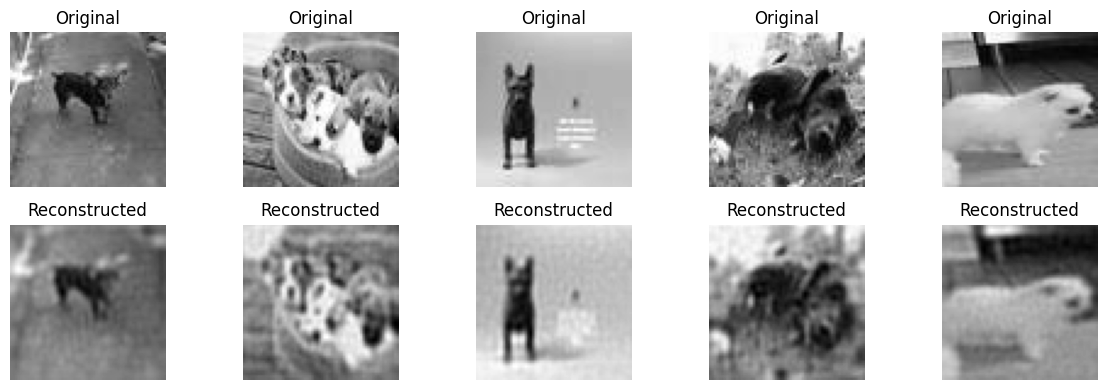

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to apply PCA, reconstruct images, and visualize a few examples
def apply_pca_reconstruct_visualize(images, n_components):
    # Initialize PCA with the specified number of components
    pca = PCA(n_components=n_components)

    # Fit PCA to the images
    pca.fit(images)

    # Transform the images using PCA
    transformed_images = pca.transform(images)

    # Reconstruct the images using inverse PCA transformation
    reconstructed_images = pca.inverse_transform(transformed_images)

    # Visualize a few original and reconstructed images
    num_examples = 5
    fig, axes = plt.subplots(nrows=2, ncols=num_examples, figsize=(12, 4))

    for i in range(num_examples):
        # Original image
        original_img = images[i].reshape(64, 64)
        axes[0, i].imshow(original_img, cmap='gray')
        axes[0, i].set_title('Original')
        axes[0, i].axis('off')

        # Reconstructed image
        reconstructed_img = reconstructed_images[i].reshape(64, 64)
        axes[1, i].imshow(reconstructed_img, cmap='gray')
        axes[1, i].set_title('Reconstructed')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Apply PCA, reconstruct images, and visualize a few examples with 95% variance
apply_pca_reconstruct_visualize(images, n_components_95)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load('/content/drive/MyDrive/vision_pca 1.npy')
print(np.shape(data))
# Load the data from the .npz file
#image_data = np.load('/content/drive/MyDrive/PRNN/Assignment3/animals10/animals10pca_data.npz')
image_data=data[:,:-1]
print(np.shape(image_data))

# Extract images and labels
labels = data[:,-1]
num_classes = len(np.unique(labels))
print(num_classes)
# Define the sizes for training, validation, and testing sets
train_size = int(0.6 * len(image_data))
val_size = int(0.2 * len(image_data))
test_size = len(image_data) - train_size - val_size

# Shuffle the data
indices = np.random.permutation(len(image_data))
image_data_shuffled = image_data[indices]
labels_shuffled = labels[indices]

# Split the data into training, validation, and testing sets
x_train = image_data_shuffled[:train_size]
y_train = labels_shuffled[:train_size].astype(int)

x_val = image_data_shuffled[train_size:train_size+val_size]
y_val = labels_shuffled[train_size:train_size+val_size].astype(int)

x_test = image_data_shuffled[train_size+val_size:]
y_test = labels_shuffled[train_size+val_size:].astype(int)

# Print the shapes of the split sets
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

# Convert labels to one-hot encoded vectors
y_train_one_hot = np.eye(num_classes)[y_train]
y_val_one_hot = np.eye(num_classes)[y_val]
y_test_one_hot = np.eye(num_classes)[y_test]





(26179, 51)
(26179, 50)
10
Shape of x_train: (15707, 50)
Shape of y_train: (15707,)
Shape of x_val: (5235, 50)
Shape of y_val: (5235,)
Shape of x_test: (5237, 50)
Shape of y_test: (5237,)


In [2]:

# Dense layer
class Layer_Dense:

    def __init__(self, num_inputs, num_neurons,weight_regularizer_l1=0, weight_regularizer_l2=0,bias_regularizer_l1=0, bias_regularizer_l2=0):
        self.weights = 0.01 * np.random.randn(num_inputs, num_neurons)
        self.biases = np.zeros((1, num_neurons))
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1

        if self.weight_regularizer_l2 > 0:
            self.dweights += self.weight_regularizer_l2 * self.weights

        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1

        if self.bias_regularizer_l2 > 0:
            self.dbiases += self.bias_regularizer_l2 * self.biases

        self.dinputs = np.dot(dvalues, self.weights.T)

    def get_parameters(self):
        return self.weights, self.biases

# Input Layer
class Layer_Input:

    def forward(self, inputs, training):
        self.output = inputs


# ReLU activation
class Activation_ReLU:

    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

    def predictions(self, outputs):
        return outputs



# Softmax activation
class Activation_Softmax:

    def forward(self, inputs, training):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1,keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
        self.output = probabilities

    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            single_output = single_output.reshape(-1, 1)
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

    def predictions(self, outputs):
        return np.argmax(outputs, axis=1)



# Sigmoid activation
class Activation_Sigmoid:

    def forward(self, inputs, training):
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))

    def backward(self, dvalues):
        self.dinputs = dvalues * (1 - self.output) * self.output

    def predictions(self, outputs):
        return (outputs > 0.5) * 1

class Optimizer_SGD:

    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):

        if self.momentum:

            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            weight_updates = self.momentum * layer.weight_momentums + self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            bias_updates = self.momentum * layer.bias_momentums + self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        layer.weights += weight_updates
        layer.biases += bias_updates

    def post_update_params(self):
        self.iterations += 1

# Adam optimizer
class Optimizer_Adam:

    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):

        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2

        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

# Common loss class
class Loss:

    def regularization_loss(self):
        regularization_loss = 0
        for layer in self.trainable_layers:

            if layer.weight_regularizer_l1 > 0:
                regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))

            if layer.weight_regularizer_l2 > 0:
                regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)

            if layer.bias_regularizer_l1 > 0:
                regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))

            if layer.bias_regularizer_l2 > 0:
                regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)

        return regularization_loss

    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers

    def calculate(self, output, y, *, include_regularization=False):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        self.accumulated_sum += np.sum(sample_losses)
        self.accumulated_count += len(sample_losses)

        if not include_regularization:
            return data_loss

        return data_loss, self.regularization_loss()

    def calculate_accumulated(self, *, include_regularization=False):
        data_loss = self.accumulated_sum / self.accumulated_count

        if not include_regularization:
            return data_loss

        return data_loss, self.regularization_loss()

    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-100, 1 - 1e-100)
        #y_pred_clipped = np.clip(y_pred, 0, 1)
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),(y_true).astype(int)]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true,axis=1)

        return -np.log(correct_confidences)

    def backward(self, dvalues, y_true):

        samples = len(dvalues)
        labels = len(dvalues[0])
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples



# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    def backward(self, dvalues, y_true):

        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), (y_true).astype(int)] -= 1
        self.dinputs = self.dinputs / samples


# Common accuracy class
class Accuracy:

    def calculate(self, predictions, y):
        comparisons = self.compare(predictions, y)
        accuracy = np.mean(comparisons)
        self.accumulated_sum += np.sum(comparisons)
        self.accumulated_count += len(comparisons)
        return accuracy

    def calculate_accumulated(self):
        accuracy = self.accumulated_sum / self.accumulated_count
        return accuracy

    def new_pass(self):
        self.accumulated_sum = 0
        self.accumulated_count = 0



# Accuracy calculation for classification model
class Accuracy_Categorical(Accuracy):

    def __init__(self, *, binary=False):
        self.binary = binary

    def init(self, y):
        pass

    def compare(self, predictions, y):
        if not self.binary and len(y.shape) == 2:
            y = np.argmax(y, axis=1)
        return predictions == y


# Model class
class Model:

    def __init__(self):
        self.layers = []
        self.softmax_classifier_output = None
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
        self.patience = 0
        self.early_stopping = False
        self.patience_counter = 0
        self.best_val_loss = np.inf
        self.epoch_counter = 0
        self.best_epoch = 0
        self.continue_training = True

    def add(self, layer):
        self.layers.append(layer)

    def set(self, *, loss=None, optimizer=None, accuracy=None):

        if loss is not None:
            self.loss = loss

        if optimizer is not None:
            self.optimizer = optimizer

        if accuracy is not None:
            self.accuracy = accuracy

    def finalize(self):
        self.input_layer = Layer_Input()
        layer_count = len(self.layers)
        self.trainable_layers = []

        for i in range(layer_count):
            if i == 0:
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i+1]

            elif i < layer_count - 1:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.layers[i+1]

            else:
                self.layers[i].prev = self.layers[i-1]
                self.layers[i].next = self.loss
                self.output_layer_activation = self.layers[i]

            if hasattr(self.layers[i], 'weights'):
                self.trainable_layers.append(self.layers[i])

        if self.loss is not None:
            self.loss.remember_trainable_layers(self.trainable_layers)

        if isinstance(self.layers[-1], Activation_Softmax) and isinstance(self.loss, Loss_CategoricalCrossentropy):
            self.softmax_classifier_output = Activation_Softmax_Loss_CategoricalCrossentropy()

    def train(self, X, y, *, epochs=1, batch_size=None, validation_data=None,early_stopping = False , patience = 5):

        self.early_stopping = early_stopping
        self.patience = patience
        self.accuracy.init(y)
        train_steps = 1

        if batch_size is not None:
            train_steps = len(X) // batch_size
            if train_steps * batch_size < len(X):
                train_steps += 1

        for epoch in range(1, epochs+1):

            if(self.continue_training == False):
                print("Stopped Training due to Early Stoping after {} epochs".format(self.epoch_counter))
                print("Optimal Validation Loss : {}".format(self.best_val_loss))
                break

            #print(f'epoch: {epoch}')
            self.loss.new_pass()
            self.accuracy.new_pass()
            for step in range(train_steps):
                if batch_size is None:
                    batch_X = X
                    batch_y = y

                else:
                    batch_X = X[step*batch_size:(step+1)*batch_size]
                    batch_y = y[step*batch_size:(step+1)*batch_size]

                output = self.forward(batch_X, training=True)

                data_loss, regularization_loss = self.loss.calculate(output, batch_y,include_regularization=True)
                loss = data_loss + regularization_loss

                predictions = self.output_layer_activation.predictions(output)
                accuracy = self.accuracy.calculate(predictions,batch_y)
                self.backward(output, batch_y)

                self.optimizer.pre_update_params()
                for layer in self.trainable_layers:
                    self.optimizer.update_params(layer)
                self.optimizer.post_update_params()

            epoch_data_loss, epoch_regularization_loss = self.loss.calculate_accumulated(include_regularization=True)
            epoch_loss = epoch_data_loss + epoch_regularization_loss
            epoch_accuracy = self.accuracy.calculate_accumulated()

            self.train_loss.append(epoch_data_loss)
            self.train_acc.append(epoch_accuracy)

            '''print(f'Training---> ' +
                   f'acc: {epoch_accuracy:.3f}, ' +
                   f'loss: {epoch_loss:.3f} (' +
                   f'data_loss: {epoch_data_loss:.3f}, ' +
                   f'reg_loss: {epoch_regularization_loss:.3f}), ' +
                   f'lr: {self.optimizer.current_learning_rate}')'''

            if validation_data is not None:
                self.evaluate(*validation_data,batch_size=batch_size)

            self.epoch_counter += 1

    def evaluate(self, X_val, y_val, *, batch_size=None):

        validation_steps = 1
        if batch_size is not None:
            validation_steps = len(X_val) // batch_size
            if validation_steps * batch_size < len(X_val):
                validation_steps += 1

        self.loss.new_pass()
        self.accuracy.new_pass()

        for step in range(validation_steps):

            if batch_size is None:
                batch_X = X_val
                batch_y = y_val

            else:
                batch_X = X_val[
                    step*batch_size:(step+1)*batch_size
                ]
                batch_y = y_val[
                    step*batch_size:(step+1)*batch_size
                ]

            output = self.forward(batch_X, training=False)

            self.loss.calculate(output, batch_y)
            predictions = self.output_layer_activation.predictions(output)
            self.accuracy.calculate(predictions, batch_y)

        validation_loss = self.loss.calculate_accumulated()
        validation_accuracy = self.accuracy.calculate_accumulated()

        if(self.epoch_counter > 5):
            if(self.early_stopping == True):
                if(self.patience_counter <= self.patience):
                    if (self.best_val_loss > validation_loss):
                      self.patience_counter = 0
                      self.best_epoch = self.epoch_counter + 1
                      self.best_val_loss = validation_loss
                      for layer in self.layers:
                          if hasattr(layer, 'weights'):
                              if not hasattr(layer, 'best_weights'):
                                  layer.best_weights = np.zeros_like(layer.weights)
                                  layer.best_biases = np.zeros_like(layer.biases)

                              layer.best_weights = layer.weights
                              layer.best_biases = layer.biases
                    else:
                        self.patience_counter += 1
                else:
                    self.continue_training = False
                    for layer in self.layers:
                        if hasattr(layer, 'weights'):
                            layer.weights = layer.best_weights
                            layer.biases = layer.best_biases

        self.val_loss.append(validation_loss)
        self.val_acc.append(validation_accuracy)

        print(f'Validation---> ' +
              f'acc: {validation_accuracy:.3f}, ' +
              f'loss: {validation_loss:.3f}')

    def predict(self, X, *, batch_size=None):

        prediction_steps = 1
        if batch_size is not None:
            prediction_steps = len(X) // batch_size

            if prediction_steps * batch_size < len(X):
                prediction_steps += 1

        output = []

        for step in range(prediction_steps):
            if batch_size is None:
                batch_X = X

            else:
                batch_X = X[step*batch_size:(step+1)*batch_size]

            batch_output = self.forward(batch_X, training=False)
            output.append(batch_output)

        return np.vstack(output)

    def predict_classes(self,X):
        output = []
        output.append(self.forward(X, training=False))
        pred = np.argmax(np.vstack(output) , axis = 1)

        return pred

    def forward(self, X, training):

        self.input_layer.forward(X, training)
        for layer in self.layers:
            layer.forward(layer.prev.output, training)

        return layer.output

    def backward(self, output, y):

        if self.softmax_classifier_output is not None:
            self.softmax_classifier_output.backward(output, y)
            self.layers[-1].dinputs = self.softmax_classifier_output.dinputs
            for layer in reversed(self.layers[:-1]):
                layer.backward(layer.next.dinputs)

            return

        self.loss.backward(output, y)

        for layer in reversed(self.layers):
            layer.backward(layer.next.dinputs)


In [3]:


class Adaboost:
    def __init__(self, n_clf=5):
        self.n_clf = n_clf
        self.clfs = []
        self.loss = []
        self.accuracy = []
        self.ensemble_accuracy = []

    def fit(self, X_true, y_true):
        n_samples, n_features = X_true.shape
        k = np.log(9)

        # Initialize weights to 1/N
        w = np.ones(n_samples) / n_samples

        self.clfs = []
        self.alphas = []

        # Iterate through classifiers
        for _ in range(self.n_clf):

            idxs = np.random.choice(np.arange(n_samples), size=n_samples, replace=True, p = w)
            X = X_true[idxs]
            y = y_true[idxs]

            # clf = DecisionTree(criteria = gini,max_depth=10)
            # clf.fit(X, y)
            # y_pred = clf.predict_classes(X_true)
            clf = Model()
            clf.add(Layer_Dense(x_train.shape[1], 256))
            clf.add(Activation_ReLU())
            clf.add(Layer_Dense(256, 128))
            clf.add(Activation_ReLU())
            clf.add(Layer_Dense(128, 64))
            clf.add(Activation_ReLU())
            clf.add(Layer_Dense(64, 10))
            clf.add(Activation_ReLU())
            clf.add(Activation_Softmax())
            clf.set(
            loss = Loss_CategoricalCrossentropy(),
            optimizer = Optimizer_Adam(learning_rate = 0.0001, decay=1e-5),
            accuracy=Accuracy_Categorical()
            )
            clf.finalize()
            clf.train(x_train, y_train, epochs=20, batch_size=128)
            y_pred = clf.predict_classes(X_true)

            e = np.sum(w[y_true!=y_pred])

            # calculate alpha
            EPS = 1e-10
            alpha = np.log((1.0 - e + EPS) / (e + EPS)) + k

            # calculate predictions and update weights
            z = (y_true==y_pred)*1

            w *= np.exp(-alpha * z)
            # Normalize to one
            w /= np.sum(w)

            y_pred_ensemble = self.predict(X_true)

            # Save classifier
            self.clfs.append(clf)
            self.alphas.append(alpha)
            self.compute_exp_loss(X_true,y_true)
            self.accuracy.append(np.mean(y_pred==y_true))
            self.ensemble_accuracy.append(np.mean(y_pred_ensemble==y_true))
            print("Learner: ",len(self.clfs))
            print("Alpha: ",alpha)
            print("Accuracy of current classifier: ",self.accuracy[-1])
            print("Exp Loss: ",self.loss[-1])
            print("Accuracy of Ensemble classifier till now: ",self.ensemble_accuracy[-1])




    def compute_exp_loss(self,X,y):
        y_pred = self.predict(X)
        z = (y==y_pred)*2 - 1
        self.loss.append(np.mean(np.exp(-z)))

    def predict(self, X):

        y_pred = np.zeros(len(X))
        pred = np.zeros((len(X),10))
        for i in range(10):
            temp = np.zeros(len(X))
            for j in range(len(self.clfs)):
                y = self.clfs[j].predict_classes(X)
                I = (y == i)
                temp +=  self.alphas[j]*I
            pred[:,i] = temp
        y_pred = np.argmax(pred,axis = 1)
        return y_pred

In [4]:
clf = Model()
clf.add(Layer_Dense(x_train.shape[1], 128))
clf.add(Activation_ReLU())
clf.add(Layer_Dense(128, 64))
clf.add(Activation_ReLU())
clf.add(Layer_Dense(64, 10))
#clf.add(Activation_ReLU())
clf.add(Activation_Softmax())
clf.set(
loss = Loss_CategoricalCrossentropy(),
optimizer = Optimizer_Adam(learning_rate = 0.0001, decay=1e-5),
accuracy=Accuracy_Categorical()
)
clf.finalize()
clf.train(x_train, y_train,validation_data=[x_val,y_val], epochs=50, batch_size=64)

Validation---> acc: 0.181, loss: 2.226
Validation---> acc: 0.181, loss: 2.215
Validation---> acc: 0.181, loss: 2.212
Validation---> acc: 0.181, loss: 2.210
Validation---> acc: 0.181, loss: 2.209
Validation---> acc: 0.181, loss: 2.208
Validation---> acc: 0.181, loss: 2.208
Validation---> acc: 0.181, loss: 2.207
Validation---> acc: 0.181, loss: 2.207
Validation---> acc: 0.183, loss: 2.206
Validation---> acc: 0.184, loss: 2.206
Validation---> acc: 0.186, loss: 2.206
Validation---> acc: 0.187, loss: 2.206
Validation---> acc: 0.186, loss: 2.206
Validation---> acc: 0.187, loss: 2.205
Validation---> acc: 0.189, loss: 2.205
Validation---> acc: 0.192, loss: 2.205
Validation---> acc: 0.192, loss: 2.205
Validation---> acc: 0.193, loss: 2.205
Validation---> acc: 0.192, loss: 2.205
Validation---> acc: 0.192, loss: 2.204
Validation---> acc: 0.193, loss: 2.204
Validation---> acc: 0.193, loss: 2.204
Validation---> acc: 0.193, loss: 2.204
Validation---> acc: 0.192, loss: 2.204
Validation---> acc: 0.193

In [5]:
num_classes = len(np.unique(labels))

# Convert labels to one-hot encoded vectors
y_train_one_hot = np.eye(num_classes)[y_train]
y_val_one_hot = np.eye(num_classes)[y_val]
y_test_one_hot = np.eye(num_classes)[y_test]

# Print the shapes of the one-hot encoded labels
print("Shape of y_train_one_hot:", y_train_one_hot.shape)
print("Shape of y_val_one_hot:", y_val_one_hot.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)

Shape of y_train_one_hot: (15707, 10)
Shape of y_val_one_hot: (5235, 10)
Shape of y_test_one_hot: (5237, 10)


In [6]:
clf_1 = Adaboost(n_clf=1)
clf_1.fit(x_train, y_train)

Learner:  1
Alpha:  0.7329496075411117
Accuracy of current classifier:  0.18781435028967977
Exp Loss:  2.276842531171312
Accuracy of Ensemble classifier till now:  0.18736868911950086


In [7]:
y_pred_test = clf_1.predict(x_test)
test_accuracy = np.mean(y_pred_test==y_test)
print("Test Accuracy",test_accuracy)

Test Accuracy 0.183692953981287


In [8]:
clf_2 = Adaboost(n_clf=2)
clf_2.fit(x_train, y_train)

Learner:  1
Alpha:  0.7316970035850212
Accuracy of current classifier:  0.18762335264531738
Exp Loss:  2.277291452490587
Accuracy of Ensemble classifier till now:  0.18736868911950086
Learner:  2
Alpha:  0.024041025927230564
Accuracy of current classifier:  0.1887693385114917
Exp Loss:  2.277291452490587
Accuracy of Ensemble classifier till now:  0.18762335264531738


In [9]:
y_pred_test = clf_2.predict(x_test)
test_accuracy = np.mean(y_pred_test==y_test)
print("Test Accuracy",test_accuracy)

Test Accuracy 0.183692953981287


In [10]:
n_classifiers = 20
clf = Adaboost(n_clf=n_classifiers)

# Train Adaboost classifier
clf.fit(x_train, y_train)

# Calculate accuracy at each iteration


Learner:  1
Alpha:  0.7329496075411117
Accuracy of current classifier:  0.18781435028967977
Exp Loss:  2.276842531171312
Accuracy of Ensemble classifier till now:  0.18736868911950086
Learner:  2
Alpha:  0.0005600489776824702
Accuracy of current classifier:  0.1874960208824091
Exp Loss:  2.276842531171312
Accuracy of Ensemble classifier till now:  0.18781435028967977
Learner:  3
Alpha:  0.8471710633844918
Accuracy of current classifier:  0.18692302794932195
Exp Loss:  2.2789374973279313
Accuracy of Ensemble classifier till now:  0.18781435028967977
Learner:  4
Alpha:  0.1301743783613083
Accuracy of current classifier:  0.1874960208824091
Exp Loss:  2.2772914524905876
Accuracy of Ensemble classifier till now:  0.18692302794932195
Learner:  5
Alpha:  0.003378662380364439
Accuracy of current classifier:  0.1874960208824091
Exp Loss:  2.2772914524905876
Accuracy of Ensemble classifier till now:  0.18762335264531738
Learner:  6
Alpha:  0.018915907551551037
Accuracy of current classifier:  0

In [11]:
y_pred_test = clf.predict(x_test)
test_accuracy = np.mean(y_pred_test==y_test)
print("Test Accuracy",test_accuracy)

Test Accuracy 0.18388390299789956
